# Results of TSD, DANN, SCADANN models across 10 days of inward rotation starting at Day_0~4 for Subject_4

Library used can be downloaded from https://github.com/aonai/long_term_EMG_myo   
&emsp; Original by UlysseCoteAllard https://github.com/UlysseCoteAllard/LongTermEMG   
Dataset recorded by https://github.com/Suguru55/Wearable_Sensor_Long-term_sEMG_Dataset   
Extended robot project can be found in https://github.com/aonai/myo_robot_arm

### Notes
* weights for TSD are total of 50 training models, 10 for each day
* weights for DANN and SCADANN are total of 45 trianing models, 9 for each day


* training examples should have shape (1, 6,)
* first session has shape (20, 572, 252)
* the following sessions have shape (4, 572, 252)
* training labels should have shape (1, 6,)


* location 0, 1, and 2 corresponds to neutral position, inward rotation, and outward rotation respectively
* session mentioned below are days, so number of sessions is 10



In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 

In [2]:
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
os.chdir(code_dir)
from PrepareAndLoadData.process_data import read_data_training

# 0. Prepare Data
use `switch=2` to train across days and individually on wearing location 0 (`session_in_include=[0]`)

### specify the directories used for running the code:
* `code_diar`: path to long_term_EMG_myo library
* `data_dir`: where raw dataset is loaded; raw data is in csv format
* `processed_data_dir`: where processed dataset is loaded; processed data is in npy pickle format
    * processed data should be a ndarray of shape   
    (controlling_factor_1 x controlling_factor_2 x num_sessions_per_gesture x #examples_window*#mov(26*22=572) x processed_channel_shape(252 for TSD, (4,8,10) for ConvNet)
* `path_<model_name>`: where model weights are saved
    * weights should be saved in folder `/Weights/<model_name>`. Each folder has subfolders containing weights for the first controlling factor.
    * weights for base model (TSD or ConvNet) contain m set of training model
    * weights for DANN and SCADANN contain m-1 set of trianing model (these models are trianed based on TSD, so they do not have a best_state_0.pt model). 
* `save_<model_name>`: where model results are saved
    * each result for testing a model on a group of dataset is saved in folder `results`. Each result has corresponding 
        * `<model_name>.txt` includes predictions, ground truths, array of accuracies for each participant and each session, and overall accuracy
        * `predictions_<model_name>.npy` includes array of accuracies, ground truths, predictions, and model outputs (probability array for each prediction)
        * remember to make blank files in these names before saving



* use `read_data_training` to process raw dataset
        

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_all_across_day_loc_1_lump5"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump5/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump5/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump5/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
read_data_training(path=data_dir, store_path = processed_data_dir,  
                   sessions_to_include =[1], switch=2, include_in_first=5,
                   start_at_participant=5, num_participant=1)

Loading and preparing Training datasets...
session  1  --- process data in days  [2, 5, 6, 16, 17, 18, 22, 24, 25, 28]
index_participant_list  [5]
READ  Sub 5 _Loc 1 _Day 2
examples_per_session =  (1, 4, 572, 252)
READ  Sub 5 _Loc 1 _Day 5
Include day  5  in first dataset  (4, 572, 252)
examples of first session =  (8, 572, 252)
examples_per_session =  (1, 8, 572, 252)
READ  Sub 5 _Loc 1 _Day 6
Include day  6  in first dataset  (8, 572, 252)
examples of first session =  (12, 572, 252)
examples_per_session =  (1, 12, 572, 252)
READ  Sub 5 _Loc 1 _Day 16
Include day  16  in first dataset  (12, 572, 252)
examples of first session =  (16, 572, 252)
examples_per_session =  (1, 16, 572, 252)
READ  Sub 5 _Loc 1 _Day 17
Include day  17  in first dataset  (16, 572, 252)
examples of first session =  (20, 572, 252)
examples_per_session =  (1, 20, 572, 252)
READ  Sub 5 _Loc 1 _Day 18


/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


examples_per_session =  (2,)
READ  Sub 5 _Loc 1 _Day 22
examples_per_session =  (3,)
READ  Sub 5 _Loc 1 _Day 24
examples_per_session =  (4,)
READ  Sub 5 _Loc 1 _Day 25
examples_per_session =  (5,)
READ  Sub 5 _Loc 1 _Day 28
examples_per_session =  (6,)
@ traning sessions =  (1, 6)
traning examples  (1, 6)
traning labels  (1, 6)
all traning examples  (1, 6)
all traning labels  (1, 6)


In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 6)
traning labels  (1, 6)


In [6]:
for idx, examples_per_session in enumerate (examples_datasets_train[0]):
    print(idx, " examples_per_session = ", np.shape(examples_per_session))
    print(idx, " labels_per_session = ", np.shape(labels_datasets_train[0][idx]))

0  examples_per_session =  (20, 572, 252)
0  labels_per_session =  (20, 572)
1  examples_per_session =  (4, 572, 252)
1  labels_per_session =  (4, 572)
2  examples_per_session =  (4, 572, 252)
2  labels_per_session =  (4, 572)
3  examples_per_session =  (4, 572, 252)
3  labels_per_session =  (4, 572)
4  examples_per_session =  (4, 572, 252)
4  labels_per_session =  (4, 572)
5  examples_per_session =  (4, 572, 252)
5  labels_per_session =  (4, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each linear layer (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 4 for myo across day training
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal; i.e. size of one training example 
    * 252 for TSD
* `learning_rate`= 0.002515
    

In [7]:
num_kernels=[200, 200, 200]                                
number_of_cycle_for_first_training = np.shape(examples_datasets_train[0][0])[0]               
number_of_cycles_total=np.shape(examples_datasets_train[-1][-1])[0]               
print("number_of_cycle_for_first_training ", number_of_cycle_for_first_training)
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     
learning_rate=0.002515

number_of_cycle_for_first_training  20
number_of_cycles_total  4


# 1. TSD_DNN
* `train_fine_tuning`: used to train data using a base model (TSD or ConvNet)
    * running this function will save num_sessions sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_standard_model_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (num_session x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have num_sessions sets of dataloaders, each correspond to one session
   

In [8]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [9]:
train_fine_tuning(examples_datasets_train, labels_datasets_train,
                  num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
                  number_of_classes=number_of_classes, 
                  number_of_cycles_total=number_of_cycles_total,
                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                  batch_size=batch_size,
                  feature_vector_input_length=feature_vector_input_length,
                  learning_rate=learning_rate)

GET one participant_examples  (6,)
   GET one training_index_examples  (20, 572, 252)  at  0
   GOT one group XY  (11440, 252)    (11440,)
       one group XY test  (0,)    (0,)
       one group XY train (10296, 252)    (10296,)
       one group XY valid (1144, 252)    (1144, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252

train Loss: 0.00083889 Acc: 0.95751953
val Loss: 0.00026176 Acc: 0.97379913
Epoch 24 of 500 took 0.118s
Epoch 24/499
----------
train Loss: 0.00081533 Acc: 0.96582031
val Loss: 0.00027236 Acc: 0.97379913
Epoch 25 of 500 took 0.106s
Epoch 25/499
----------
train Loss: 0.00074101 Acc: 0.96679688
val Loss: 0.00024066 Acc: 0.98689956
Epoch 26 of 500 took 0.108s
Epoch 26/499
----------
train Loss: 0.00072684 Acc: 0.96728516
val Loss: 0.00027464 Acc: 0.98253275
Epoch 27 of 500 took 0.106s
Epoch 27/499
----------
train Loss: 0.00074109 Acc: 0.96630859
val Loss: 0.00025871 Acc: 0.98253275
Epoch 28 of 500 took 0.108s
Epoch 28/499
----------
train Loss: 0.00083892 Acc: 0.96826172
val Loss: 0.00024510 Acc: 0.97816594
Epoch 29 of 500 took 0.107s
Epoch 29/499
----------
train Loss: 0.00065410 Acc: 0.96923828
val Loss: 0.00021956 Acc: 0.98689956
Epoch 30 of 500 took 0.110s
Epoch 30/499
----------
train Loss: 0.00067853 Acc: 0.97216797
val Loss: 0.00030607 Acc: 0.97816594
Epoch 31 of 500 took 0.105s


train Loss: 0.00193523 Acc: 0.90576172
val Loss: 0.00081714 Acc: 0.90829694
Epoch 7 of 500 took 0.110s
Epoch 7/499
----------
train Loss: 0.00200798 Acc: 0.91162109
val Loss: 0.00078526 Acc: 0.90393013
Epoch 8 of 500 took 0.108s
Epoch 8/499
----------
train Loss: 0.00195299 Acc: 0.91552734
val Loss: 0.00110107 Acc: 0.90829694
Epoch 9 of 500 took 0.109s
Epoch 9/499
----------
train Loss: 0.00175766 Acc: 0.91748047
val Loss: 0.00089880 Acc: 0.92576419
Epoch 10 of 500 took 0.107s
Epoch 10/499
----------
train Loss: 0.00163436 Acc: 0.92822266
val Loss: 0.00054111 Acc: 0.95196507
New best validation loss: 0.0005411119179954695
Epoch 11 of 500 took 0.110s
Epoch 11/499
----------
train Loss: 0.00181145 Acc: 0.92041016
val Loss: 0.00077278 Acc: 0.92139738
Epoch 12 of 500 took 0.106s
Epoch 12/499
----------
train Loss: 0.00178472 Acc: 0.91015625
val Loss: 0.00077553 Acc: 0.930131
Epoch 13 of 500 took 0.109s
Epoch 13/499
----------
train Loss: 0.00142295 Acc: 0.93017578
val Loss: 0.00089605 Acc:

train Loss: 0.00164055 Acc: 0.92138672
val Loss: 0.00065289 Acc: 0.93886463
Epoch 11 of 500 took 0.108s
Epoch 11/499
----------
train Loss: 0.00150564 Acc: 0.92871094
val Loss: 0.00061576 Acc: 0.95196507
Epoch 12 of 500 took 0.113s
Epoch 12/499
----------
train Loss: 0.00148788 Acc: 0.93017578
val Loss: 0.00047445 Acc: 0.95633188
New best validation loss: 0.0004744538508648435
Epoch 13 of 500 took 0.111s
Epoch 13/499
----------
train Loss: 0.00148121 Acc: 0.93066406
val Loss: 0.00066965 Acc: 0.93886463
Epoch 14 of 500 took 0.105s
Epoch 14/499
----------
train Loss: 0.00147054 Acc: 0.93115234
val Loss: 0.00063037 Acc: 0.93886463
Epoch 15 of 500 took 0.113s
Epoch 15/499
----------
train Loss: 0.00136328 Acc: 0.93945312
val Loss: 0.00061014 Acc: 0.94323144
Epoch 16 of 500 took 0.108s
Epoch 16/499
----------
train Loss: 0.00124518 Acc: 0.94140625
val Loss: 0.00044561 Acc: 0.96943231
Epoch 17 of 500 took 0.109s
Epoch 17/499
----------
train Loss: 0.00131231 Acc: 0.93554688
val Loss: 0.00049

In [10]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (6,)
   GET one training_index_examples  (20, 572, 252)  at  0
   GOT one group XY  (11440, 252)    (11440,)
       one group XY test  (2860, 252)    (2860, 252)
       one group XY train (10296, 252)    (10296,)
       one group XY valid (1144, 252)    (1144, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [11]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
index_participant_list = ['0~4', 5, 6, 7, 8, 9]
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
TSD_df

,Participant_5
Day_0~4,0.915734
Day_5,0.814685
Day_6,0.804196
Day_7,0.729021
Day_8,0.653846
Day_9,0.673077


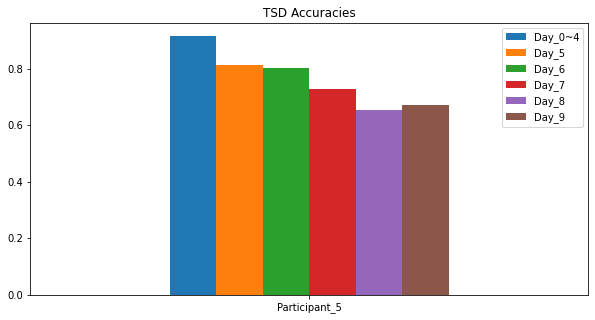

In [12]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [13]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [14]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Loc1_Sub"
n_name = "Day0~4->"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 6)
predictions =  (1, 6)
index_participant_list  ['0~4', 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 6)


,Unnamed: 0,Loc1_Sub5_Day0~4->0~4,Loc1_Sub5_Day0~4->5,Loc1_Sub5_Day0~4->6,Loc1_Sub5_Day0~4->7,Loc1_Sub5_Day0~4->8,Loc1_Sub5_Day0~4->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.969231,1.000000,0.769231,0.500000,0.423077,0.384615
2,M2,0.946154,0.692308,0.730769,0.730769,0.884615,0.807692
3,M3,0.876923,1.000000,0.884615,0.230769,0.807692,0.076923
4,M4,0.869231,0.615385,0.000000,0.076923,0.076923,0.000000
5,M5,1.000000,0.769231,1.000000,0.730769,0.961538,0.884615
6,M6,1.000000,1.000000,0.538462,0.423077,0.461538,1.000000
7,M7,0.992308,0.884615,1.000000,1.000000,0.923077,0.884615
8,M8,0.915385,1.000000,0.961538,0.884615,0.923077,0.884615
9,M9,0.892308,0.846154,0.961538,0.884615,0.884615,0.653846


# 2. DANN
* `train_DANN`: train DANN model using the first set of training weights from base model
    * num_sessions-1 sets of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [16]:
train_DANN(examples_datasets_train, labels_datasets_train, 
          num_kernels=num_kernels,
          path_weights_fine_tuning=path_TSD,
          number_of_classes=number_of_classes,
          number_of_cycles_total = number_of_cycles_total,
          number_of_cycle_for_first_training = number_of_cycle_for_first_training,
          batch_size=batch_size,
          feature_vector_input_length=feature_vector_input_length,
          path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

GET one participant_examples  (6,)
   GET one training_index_examples  (20, 572, 252)  at  0
   GOT one group XY  (11440, 252)    (11440,)
       one group XY test  (0,)    (0,)
       one group XY train (10296, 252)    (10296,)
       one group XY valid (1144, 252)    (1144, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252

Accuracy source 0.879395, main loss classifier 0.250042, source classification loss 0.346536, loss domain distinction 0.231800, accuracy domain distinction 0.494873
VALIDATION Loss: 0.32476029 Acc: 0.88199301
New best validation loss:  0.3247602880001068
Epoch 1 of 500 took 0.241s
Accuracy source 0.884766, main loss classifier 0.232763, source classification loss 0.318454, loss domain distinction 0.191903, accuracy domain distinction 0.499756
VALIDATION Loss: 0.26539195 Acc: 0.8951049
New best validation loss:  0.2653919458389282
Epoch 2 of 500 took 0.260s
Accuracy source 0.876953, main loss classifier 0.246131, source classification loss 0.348003, loss domain distinction 0.189323, accuracy domain distinction 0.500000
VALIDATION Loss: 0.32168034 Acc: 0.87587413
Epoch 3 of 500 took 0.271s
Accuracy source 0.876953, main loss classifier 0.246347, source classification loss 0.349526, loss domain distinction 0.187165, accuracy domain distinction 0.500244
VALIDATION Loss: 0.44362652 Acc: 0.8

Accuracy source 0.885742, main loss classifier 0.230688, source classification loss 0.325447, loss domain distinction 0.182406, accuracy domain distinction 0.500000
VALIDATION Loss: 0.41432518 Acc: 0.86363636
Epoch 8 of 500 took 0.235s
Accuracy source 0.907715, main loss classifier 0.202594, source classification loss 0.268868, loss domain distinction 0.181710, accuracy domain distinction 0.500000
VALIDATION Loss: 0.38151282 Acc: 0.86013986
Epoch 9 of 500 took 0.235s
Accuracy source 0.892090, main loss classifier 0.217118, source classification loss 0.298581, loss domain distinction 0.182306, accuracy domain distinction 0.500000
VALIDATION Loss: 0.31192154 Acc: 0.88636364
New best validation loss:  0.31192153692245483
Epoch 10 of 500 took 0.241s
Accuracy source 0.907227, main loss classifier 0.208123, source classification loss 0.280923, loss domain distinction 0.181013, accuracy domain distinction 0.500000
VALIDATION Loss: 0.35221824 Acc: 0.8715035
Epoch 11 of 500 took 0.235s
Accuracy

Accuracy source 0.896484, main loss classifier 0.206149, source classification loss 0.278022, loss domain distinction 0.180834, accuracy domain distinction 0.500000
VALIDATION Loss: 0.27764004 Acc: 0.89423077
Epoch 15 of 500 took 0.236s
Accuracy source 0.897949, main loss classifier 0.221128, source classification loss 0.308165, loss domain distinction 0.180306, accuracy domain distinction 0.500000
VALIDATION Loss: 0.26292115 Acc: 0.8986014
Epoch 16 of 500 took 0.235s
Accuracy source 0.900879, main loss classifier 0.206258, source classification loss 0.278360, loss domain distinction 0.180694, accuracy domain distinction 0.500000
VALIDATION Loss: 0.29057533 Acc: 0.88461538
Epoch 17 of 500 took 0.235s
Accuracy source 0.921875, main loss classifier 0.185715, source classification loss 0.237535, loss domain distinction 0.180436, accuracy domain distinction 0.500000
VALIDATION Loss: 0.30418715 Acc: 0.87937063
Epoch 18 of 500 took 0.234s
Accuracy source 0.907715, main loss classifier 0.1969

Accuracy source 0.918457, main loss classifier 0.190056, source classification loss 0.244892, loss domain distinction 0.183704, accuracy domain distinction 0.500000
VALIDATION Loss: 0.24570388 Acc: 0.90821678
Epoch 22 of 500 took 0.234s
Accuracy source 0.896484, main loss classifier 0.206293, source classification loss 0.277597, loss domain distinction 0.180930, accuracy domain distinction 0.500000
VALIDATION Loss: 0.26109314 Acc: 0.90034965
Training complete in 0m 6s


In [17]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (6,)
   GET one training_index_examples  (20, 572, 252)  at  0
   GOT one group XY  (11440, 252)    (11440,)
       one group XY test  (2860, 252)    (2860, 252)
       one group XY train (10296, 252)    (10296,)
       one group XY valid (1144, 252)    (1144, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [18]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
DANN_df

,Participant_5
Day_0~4,0.915734
Day_5,0.90035
Day_6,0.835664
Day_7,0.770979
Day_8,0.711538
Day_9,0.70979


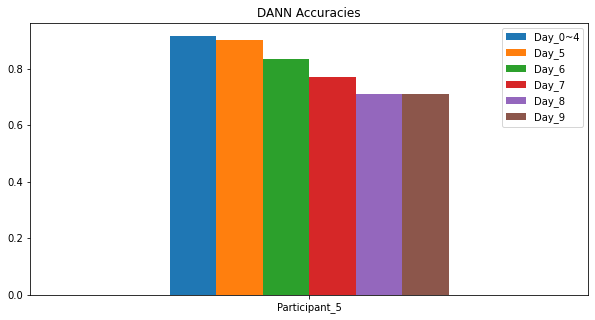

In [19]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

In [20]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_DANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 6)
predictions =  (1, 6)
index_participant_list  ['0~4', 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 6)


,Unnamed: 0,Loc1_Sub5_Day0~4->0~4,Loc1_Sub5_Day0~4->5,Loc1_Sub5_Day0~4->6,Loc1_Sub5_Day0~4->7,Loc1_Sub5_Day0~4->8,Loc1_Sub5_Day0~4->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.969231,0.961538,0.807692,0.615385,0.461538,0.692308
2,M2,0.946154,0.576923,0.730769,0.730769,0.692308,0.653846
3,M3,0.876923,1.000000,0.923077,0.769231,0.961538,0.307692
4,M4,0.869231,0.923077,0.230769,0.115385,0.269231,0.000000
5,M5,1.000000,1.000000,1.000000,0.692308,1.000000,0.846154
6,M6,1.000000,1.000000,0.615385,0.653846,0.500000,1.000000
7,M7,0.992308,0.846154,1.000000,1.000000,0.923077,0.884615
8,M8,0.915385,0.961538,0.846154,0.538462,0.807692,0.500000
9,M9,0.892308,0.769231,0.884615,0.692308,0.730769,0.423077


# 3. SCADANN

* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels: 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * num_sessions-1 sets of training weights will be saved


In [21]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import \
    run_SCADANN_training_sessions, test_network_SCADANN

In [22]:
percentage_same_gesture_stable = 0.75 
run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
                              num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
                              path_weights_to_save_to=path_SCADANN,
                              path_weights_Adversarial_training=path_DANN,
                              path_weights_Normal_training=path_TSD,
                              number_of_cycles_total = number_of_cycles_total, 
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              number_of_classes=number_of_classes,
                              learning_rate=learning_rate)

GET one participant_examples  (6,)
   GET one training_index_examples  (20, 572, 252)  at  0
   GOT one group XY  (11440, 252)    (11440,)
       one group XY test  (0,)    (0,)
       one group XY train (11440, 252)    (11440,)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  4
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one trai

Accuracy total 0.875579, main loss classifier 0.470333, source accuracy 0.884259 source classification loss 0.314442, target accuracy 0.866898 target loss 0.400255 accuracy domain distinction 0.500000 loss domain distinction 1.129842,
VALIDATION Loss: 0.22494781 Acc: 0.91494253
New best validation loss:  0.224947812301772
Epoch 2 of 500 took 0.398s
Accuracy total 0.888021, main loss classifier 0.419745, source accuracy 0.895833 source classification loss 0.289079, target accuracy 0.880208 target loss 0.338880 accuracy domain distinction 0.500000 loss domain distinction 1.057651,
VALIDATION Loss: 0.22211971 Acc: 0.92413793
New best validation loss:  0.22211970814636775
Epoch 3 of 500 took 0.355s
Accuracy total 0.882523, main loss classifier 0.441209, source accuracy 0.888889 source classification loss 0.308842, target accuracy 0.876157 target loss 0.364247 accuracy domain distinction 0.500000 loss domain distinction 1.046649,
VALIDATION Loss: 0.22966437 Acc: 0.92183908
Epoch 4 of 500 to

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.8076923076923077   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  nan  len before:  26   len after:  0
BEFORE:  0.8076923076923077  

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Accuracy total 0.871250, main loss classifier 0.485914, source accuracy 0.891250 source classification loss 0.298798, target accuracy 0.851250 target loss 0.446797 accuracy domain distinction 0.500000 loss domain distinction 1.131163,
VALIDATION Loss: 0.19235699 Acc: 0.92978208
New best validation loss:  0.19235699304512568
Epoch 2 of 500 took 0.423s
Accuracy total 0.880938, main loss classifier 0.456274, source accuracy 0.903125 source classification loss 0.299204, target accuracy 0.858750 target loss 0.401229 accuracy domain distinction 0.500000 loss domain distinction 1.060569,
VALIDATION Loss: 0.22858511 Acc: 0.92009685
Epoch 3 of 500 took 0.447s
Accuracy total 0.884375, main loss classifier 0.435394, source accuracy 0.881250 source classification loss 0.328169, target accuracy 0.887500 target loss 0.332752 accuracy domain distinction 0.500000 loss domain distinction 1.049339,
VALIDATION Loss: 0.16435634 Acc: 0.95399516
New best validation loss:  0.16435634344816208
Epoch 4 of 500 

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.8076923076923077   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  nan  len before:  26   len after:  0
BEFORE:  0.8076923076923077  

Accuracy total 0.842500, main loss classifier 0.595721, source accuracy 0.886250 source classification loss 0.322834, target accuracy 0.798750 target loss 0.643148 accuracy domain distinction 0.500000 loss domain distinction 1.127298,
VALIDATION Loss: 0.36989020 Acc: 0.8880597
New best validation loss:  0.3698901959827968
Epoch 2 of 500 took 0.350s
Accuracy total 0.857812, main loss classifier 0.554053, source accuracy 0.872500 source classification loss 0.365260, target accuracy 0.843125 target loss 0.531102 accuracy domain distinction 0.500000 loss domain distinction 1.058723,
VALIDATION Loss: 0.29698558 Acc: 0.90547264
New best validation loss:  0.2969855751310076
Epoch 3 of 500 took 0.331s
Accuracy total 0.869375, main loss classifier 0.502631, source accuracy 0.890625 source classification loss 0.315651, target accuracy 0.848125 target loss 0.481714 accuracy domain distinction 0.500000 loss domain distinction 1.039488,
VALIDATION Loss: 0.26354082 Acc: 0.91044776
New best validatio

Accuracy total 0.894375, main loss classifier 0.428893, source accuracy 0.890625 source classification loss 0.309526, target accuracy 0.898125 target loss 0.342123 accuracy domain distinction 0.500000 loss domain distinction 1.030687,
VALIDATION Loss: 0.15828739 Acc: 0.94527363
New best validation loss:  0.15828738680907659
Epoch 28 of 500 took 0.334s
Accuracy total 0.888750, main loss classifier 0.436463, source accuracy 0.900625 source classification loss 0.289052, target accuracy 0.876875 target loss 0.377023 accuracy domain distinction 0.500000 loss domain distinction 1.034249,
VALIDATION Loss: 0.30638359 Acc: 0.89303483
Epoch 29 of 500 took 0.329s
Accuracy total 0.888125, main loss classifier 0.434773, source accuracy 0.888750 source classification loss 0.301257, target accuracy 0.887500 target loss 0.362275 accuracy domain distinction 0.500000 loss domain distinction 1.030076,
VALIDATION Loss: 0.23528246 Acc: 0.91542289
Epoch 30 of 500 took 0.360s
Accuracy total 0.884687, main lo

BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
ACCURACY MODEL:  0.8859265734265734   Accuracy pseudo: 0.9608835710998619  len pseudo:  2173    len predictions 2288
HANDLING NEW SESSION  2
Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.8076923076923077   AFTER:  0.8076923076923077  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1

BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  0.5384615384615384  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  0.4  len before:  26   len after:  10
BEFORE:  0.038461538461538464   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  0.0  len before:  26   len after:  1
BEFORE:  0.5769230769230769   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after: 

STARTING TRAINING
Accuracy total 0.841562, main loss classifier 0.623629, source accuracy 0.868125 source classification loss 0.399255, target accuracy 0.815000 target loss 0.622229 accuracy domain distinction 0.500000 loss domain distinction 1.128864,
VALIDATION Loss: 0.34103993 Acc: 0.88674699
New best validation loss:  0.3410399343286242
Epoch 2 of 500 took 0.337s
Accuracy total 0.857812, main loss classifier 0.552115, source accuracy 0.878750 source classification loss 0.343375, target accuracy 0.836875 target loss 0.550362 accuracy domain distinction 0.500000 loss domain distinction 1.052474,
VALIDATION Loss: 0.33612141 Acc: 0.89638554
New best validation loss:  0.33612141013145447
Epoch 3 of 500 took 0.332s
Accuracy total 0.856875, main loss classifier 0.533304, source accuracy 0.862500 source classification loss 0.377576, target accuracy 0.851250 target loss 0.480629 accuracy domain distinction 0.500000 loss domain distinction 1.042008,
VALIDATION Loss: 0.35062395 Acc: 0.8963855

Accuracy total 0.878750, main loss classifier 0.462917, source accuracy 0.895625 source classification loss 0.313741, target accuracy 0.861875 target loss 0.405646 accuracy domain distinction 0.500000 loss domain distinction 1.032233,
VALIDATION Loss: 0.29093083 Acc: 0.90120482
Epoch 28 of 500 took 0.331s
Accuracy total 0.880938, main loss classifier 0.473275, source accuracy 0.879375 source classification loss 0.363336, target accuracy 0.882500 target loss 0.378110 accuracy domain distinction 0.500000 loss domain distinction 1.025519,
VALIDATION Loss: 0.27841633 Acc: 0.91807229
Epoch 29 of 500 took 0.336s
Accuracy total 0.882188, main loss classifier 0.479172, source accuracy 0.878125 source classification loss 0.365622, target accuracy 0.886250 target loss 0.386771 accuracy domain distinction 0.500000 loss domain distinction 1.029757,
VALIDATION Loss: 0.34295819 Acc: 0.88192771
Epoch 30 of 500 took 0.330s
Training complete in 0m 10s
['participant_0']
Optimizer =  <generator object Mo

BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
ACCURACY MODEL:  0.8859265734265734   Accuracy pseudo: 0.9608835710998619  len pseudo:  2173    len predictions 2288
HANDLING NEW SESSION  2
Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.7307692307692307  len before:

BEFORE:  0.7307692307692307   AFTER:  0.8  len before:  26   len after:  10
BEFORE:  0.5   AFTER:  0.0  len before:  26   len after:  9
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6666666666666666  len before:  26   len after:  9
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  0.6470588235294118  len before:  26   len after:  17
BEFORE:  0.3076923076923077   AFTER:  0.1111111111111111  len before:  26   len after:  9
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  0.8461538461538461  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  0.6111111111111112  len before:  26   len after:  18
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.07692307692307693   AFTER:  0.0  len before:  26   len after:  15
BEFORE:  0.5384615384615384   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.0  

Accuracy total 0.862812, main loss classifier 0.525860, source accuracy 0.879375 source classification loss 0.362294, target accuracy 0.846250 target loss 0.482097 accuracy domain distinction 0.500000 loss domain distinction 1.036645,
VALIDATION Loss: 0.32523530 Acc: 0.87780549
Epoch 7 of 500 took 0.333s
Accuracy total 0.856563, main loss classifier 0.532159, source accuracy 0.876250 source classification loss 0.366144, target accuracy 0.836875 target loss 0.489621 accuracy domain distinction 0.500000 loss domain distinction 1.042766,
VALIDATION Loss: 0.26956988 Acc: 0.90523691
New best validation loss:  0.2695698823247637
Epoch 8 of 500 took 0.332s
Accuracy total 0.864062, main loss classifier 0.523679, source accuracy 0.885000 source classification loss 0.347862, target accuracy 0.843125 target loss 0.492223 accuracy domain distinction 0.500000 loss domain distinction 1.036366,
VALIDATION Loss: 0.25835092 Acc: 0.90024938
New best validation loss:  0.25835091939994265
Epoch 9 of 500 t

Accuracy total 0.879687, main loss classifier 0.449883, source accuracy 0.886250 source classification loss 0.332606, target accuracy 0.873125 target loss 0.361834 accuracy domain distinction 0.500000 loss domain distinction 1.026627,
VALIDATION Loss: 0.25463642 Acc: 0.90773067
Epoch 33 of 500 took 0.329s
Accuracy total 0.882188, main loss classifier 0.470555, source accuracy 0.876875 source classification loss 0.362735, target accuracy 0.887500 target loss 0.372431 accuracy domain distinction 0.500000 loss domain distinction 1.029722,
VALIDATION Loss: 0.22646954 Acc: 0.9127182
Epoch 34 of 500 took 0.332s
Accuracy total 0.877812, main loss classifier 0.475287, source accuracy 0.881250 source classification loss 0.355874, target accuracy 0.874375 target loss 0.388767 accuracy domain distinction 0.500000 loss domain distinction 1.029669,
VALIDATION Loss: 0.28064326 Acc: 0.90024938
Epoch 35 of 500 took 0.330s
Accuracy total 0.868437, main loss classifier 0.487409, source accuracy 0.861875

In [23]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (6,)
   GET one training_index_examples  (20, 572, 252)  at  0
   GOT one group XY  (11440, 252)    (11440,)
       one group XY test  (2860, 252)    (2860, 252)
       one group XY train (10296, 252)    (10296,)
       one group XY valid (1144, 252)    (1144, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)

In [24]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
SCADANN_df

,Participant_5
Day_0~4,0.915734
Day_5,0.914336
Day_6,0.853147
Day_7,0.823427
Day_8,0.730769
Day_9,0.795455


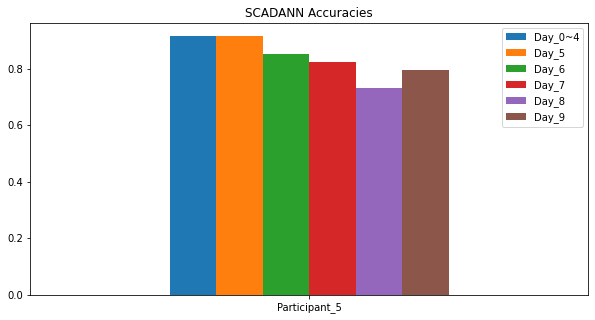

In [25]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

In [26]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_SCADANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 6)
predictions =  (1, 6)
index_participant_list  ['0~4', 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 6)


,Unnamed: 0,Loc1_Sub5_Day0~4->0~4,Loc1_Sub5_Day0~4->5,Loc1_Sub5_Day0~4->6,Loc1_Sub5_Day0~4->7,Loc1_Sub5_Day0~4->8,Loc1_Sub5_Day0~4->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.969231,0.961538,0.923077,0.653846,0.461538,0.884615
2,M2,0.946154,0.615385,0.730769,0.730769,0.730769,0.807692
3,M3,0.876923,1.000000,0.923077,0.769231,1.000000,0.500000
4,M4,0.869231,0.961538,0.230769,0.000000,0.076923,0.000000
5,M5,1.000000,1.000000,1.000000,0.961538,0.923077,0.961538
6,M6,1.000000,1.000000,0.653846,0.884615,0.576923,1.000000
7,M7,0.992308,0.884615,1.000000,1.000000,1.000000,1.000000
8,M8,0.915385,0.961538,0.884615,0.500000,0.807692,0.884615
9,M9,0.892308,0.769231,0.846154,0.769231,0.769231,0.730769


# Conclusion
Suppose there is a ndarray of NxM dataloaders, then N group of models will be trained, and each group will have M model. Each group is independent of the other, and each model within a group is dependent on its previous training weights.

In general, overall accuracies of SCADANN are better than DANN, and DANN is better than TSD.
Occasionally accuracies of SCADANN end up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducible if processed dataset sticks to the shape defined above.  

The amount of increase in accuracies from DANN to SCADANN looks random. But if the base model is better at classifying one session, then its corresponding SCADANN is also better at classifying the same session. Given such result, to obtain the best performance from SCADANN, a good model trained with good data should be the starting point.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correcltyTSD_acc_overall_one = np.mean(TSD_acc, axis=0)

In [27]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Participant_5
Day_0~4,0.915734
Day_5,0.814685
Day_6,0.804196
Day_7,0.729021
Day_8,0.653846
Day_9,0.673077


DANN


,Participant_5
Day_0~4,0.915734
Day_5,0.90035
Day_6,0.835664
Day_7,0.770979
Day_8,0.711538
Day_9,0.70979


SCADANN


,Participant_5
Day_0~4,0.915734
Day_5,0.914336
Day_6,0.853147
Day_7,0.823427
Day_8,0.730769
Day_9,0.795455


In [28]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Day_'+index_participant_list[0])
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/across_day_loc1_lump5_diff.csv')

,Participant_5
Day_5,0.09965
Day_6,0.048951
Day_7,0.094406
Day_8,0.076923
Day_9,0.122378


In [29]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.765093
DANN,0.807343
SCADANN,0.838811


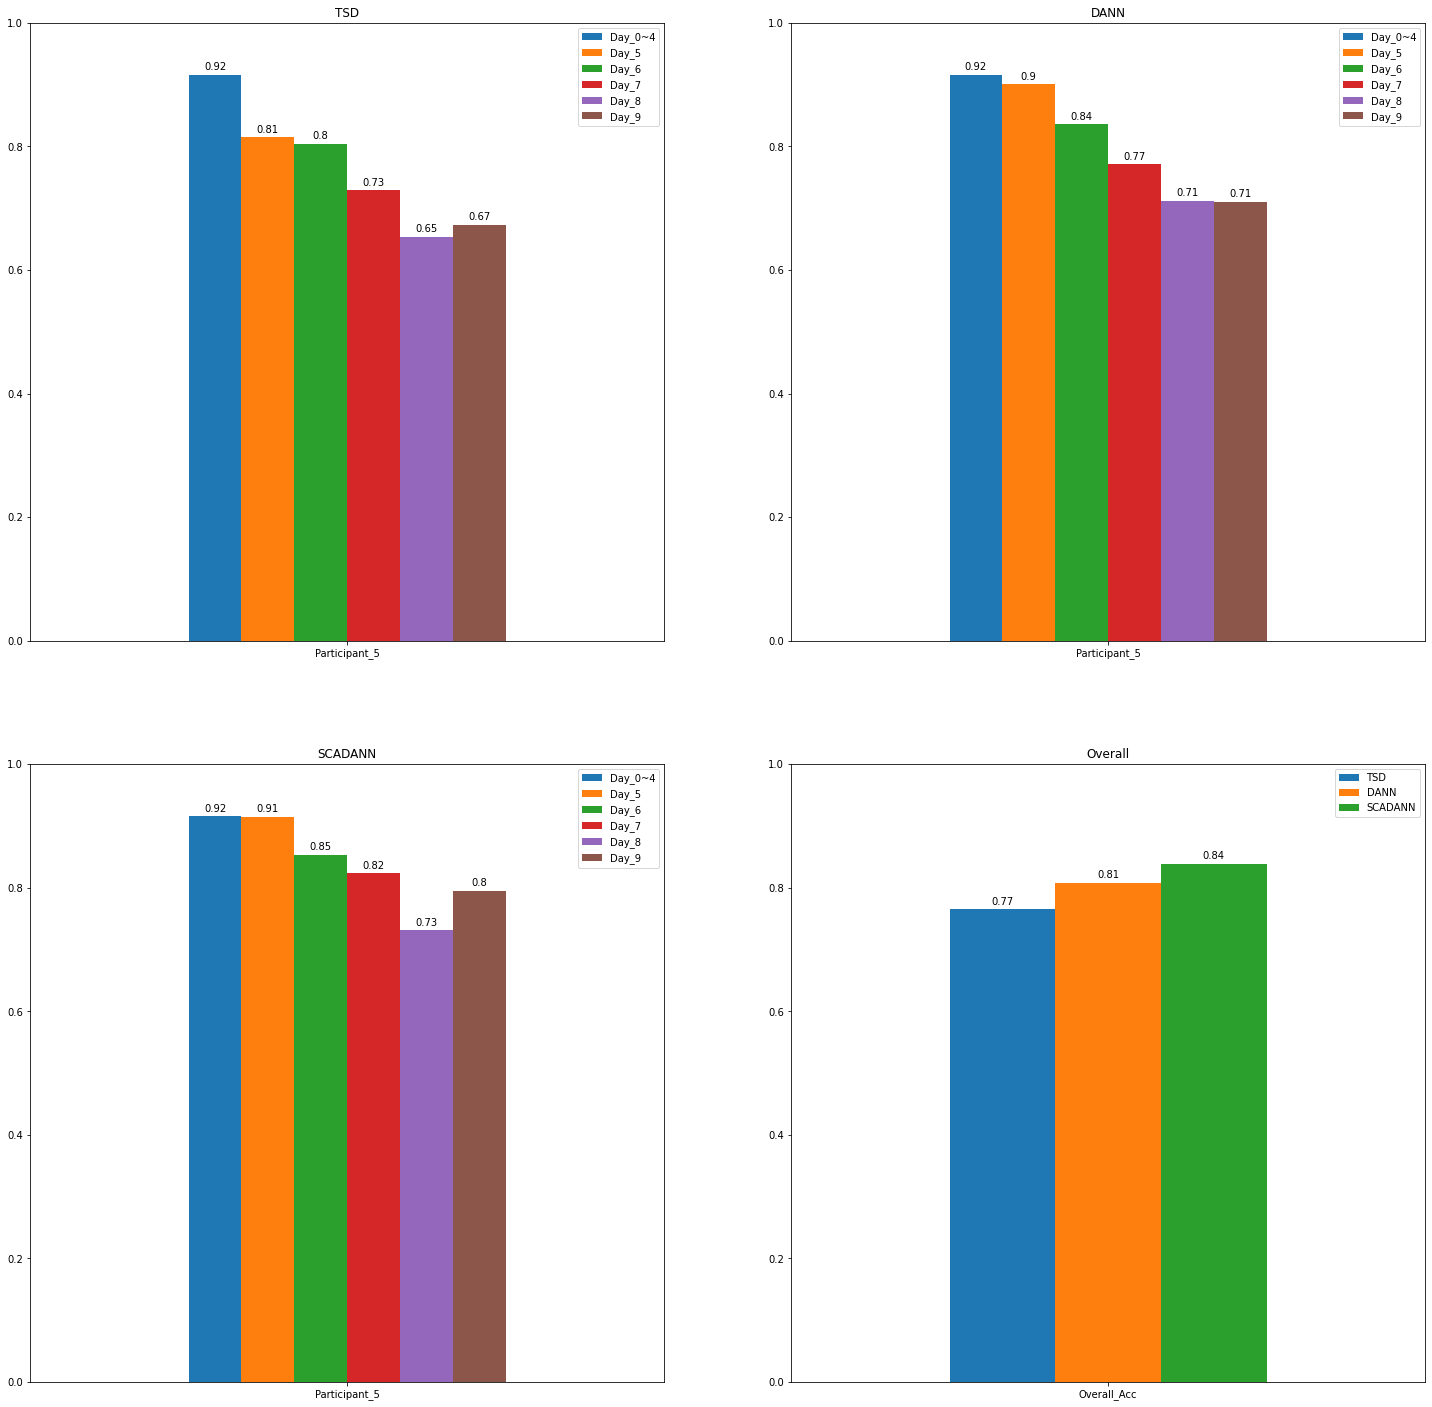

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8),textcoords='offset points')
